In [36]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [37]:
data=pd.read_excel(r'D:\recabe\ML\unsupervised data\Online Retail Dataset\Online Retail- sql practise.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [38]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
data.duplicated().sum()

5268

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [43]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data Cleaning

In [44]:
data_copy = data.copy()


In [45]:
data_copy = data_copy.dropna(subset=['CustomerID'])


In [46]:
data_copy=data_copy[(data_copy["Quantity"]>0 )&( data_copy["UnitPrice"]>0 )]

In [47]:
data_copy["InvoiceNo"].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
544170      1
556842      1
556831      1
556817      1
542591      1
Name: count, Length: 18532, dtype: int64

In [48]:
data_copy["TotalPrice"]=data_copy["Quantity"]*data_copy["UnitPrice"]

In [49]:
data_copy["InvoiceDate"]=pd.to_datetime(data_copy["InvoiceDate"])

## Feature Engineering

In [50]:
snapshot_date = data_copy['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [51]:
snapshot_date = data_copy['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data_copy.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [52]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=pd.DataFrame(
    scaler.fit_transform(rfm),
    columns=rfm.columns
)
rfm_scaled

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812
...,...,...,...
4333,1.854587,-0.425097,-0.207931
4334,0.884612,-0.425097,-0.219037
4335,-0.845342,-0.295178,-0.208214
4336,-0.885341,1.523687,-0.000352


## Clustering

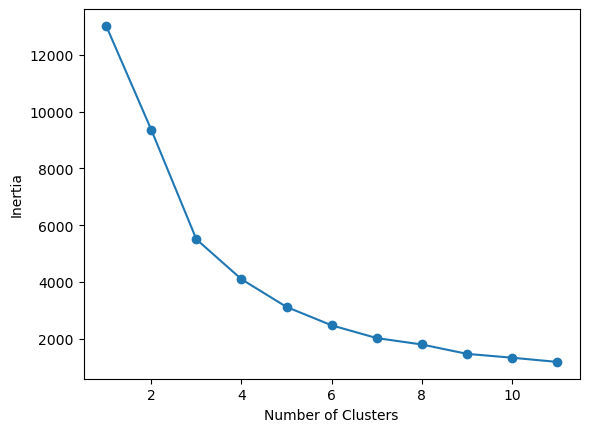

In [57]:
from sklearn.cluster import KMeans
inertia=[]
for k in range(1,12):
    kmean=KMeans(n_clusters=k,random_state =42)
    kmean.fit(rfm_scaled)
    inertia.append(kmean.inertia_)

plt.plot(range(1,12), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [58]:
kmeans=KMeans(n_clusters=4,random_state=42)
rfm["cluster"]=kmeans.fit_predict(rfm_scaled)

In [65]:
silhouette_score(rfm_scaled, rfm["cluster"])


0.6162275299061803

In [59]:
rfm

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,326,1,77183.60,3
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,1
...,...,...,...,...
18280.0,278,1,180.60,1
18281.0,181,1,80.82,1
18282.0,8,2,178.05,0


In [61]:
rfm_summary =rfm.groupby("cluster").mean()
rfm_summary

,Recency,Frequency,Monetary
cluster,,,
0,43.702685,3.682711,1353.625312
1,248.075914,1.552015,478.848773
2,7.384615,82.538462,127187.959231
3,15.500000,22.333333,12690.500392


## Visualization

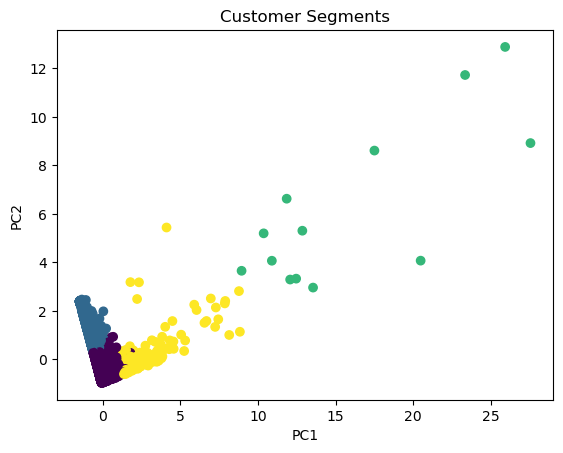

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(rfm_scaled)

plt.scatter(pca_data[:,0], pca_data[:,1], c=rfm['cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments")
plt.show()


In [ ]:
cluster_labels = {
    0: "Regular Customers",
    1: "Lost / At-Risk Customers",
    2: "VIP / Champions",
    3: "Loyal High-Value Customers"
}

rfm['Segment'] = rfm['cluster'].map(cluster_labels)

In [69]:
rfm

,Recency,Frequency,Monetary,cluster,Segment
CustomerID,,,,,
12346.0,326,1,77183.60,3,Loyal High-Value Customers
12347.0,2,7,4310.00,0,Regular Customers
12348.0,75,4,1797.24,0,Regular Customers
12349.0,19,1,1757.55,0,Regular Customers
12350.0,310,1,334.40,1,Lost / At-Risk Customers
...,...,...,...,...,...
18280.0,278,1,180.60,1,Lost / At-Risk Customers
18281.0,181,1,80.82,1,Lost / At-Risk Customers
18282.0,8,2,178.05,0,Regular Customers
